# Python training 2 - Simon Dequidt

The following exercises are taken from : 
https://github.com/codebasics/py/tree/master/Basics/Exercise

## Basics 

### 1-16 please see 30-Days Challenge:
https://github.com/SimonDequidt/Python-training/blob/main/30D-Challenge.ipynb

### 17 : inheritance

In [2]:
class Animal:
    def __init__(self, habitat):
        self.habitat = habitat

    def print_habitat(self):
        print(self.habitat)

    def sound(self):
        print("Some Animal Sound")


class Dog(Animal):
    def __init__(self):
        super().__init__("Kennel")

    def sound(self):
        print("Woof woof!")

In [3]:
x = Dog()
x.print_habitat()
x.sound()

Kennel
Woof woof!


### 18 : multiple inheritance

In [16]:
class Teacher:
    def teachers_action(self):
        print("I can teach")

    def student_to_teacher(self, Students_action):
        print("I used to be a student, but now I'm a teacher")


class Student:
    def Students_action(self):
        print("I can learn")


class Youtuber:
    def youtubers_action(self):
        print("I can teach and learn")


class Person(Teacher, Student, Youtuber):
    pass


In [24]:
coder = Person()
coder.teachers_action()
coder.student_to_teacher('')
coder.Students_action()
coder.youtubers_action()

I can teach
I used to be a student, but now I'm a teacher
I can learn
I can teach and learn


### 19 : raise exception finally

In [27]:
# for making exception just make subclass of Exception
class AdultException(Exception):
    pass

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def get_minor_age(self):
        if int(self.age) >= 18:
            raise AdultException
        else:
            return self.age

    def display(self):
        try:
            print(f"age -> {self.get_minor_age()}")
        except AdultException:
            print("Person is an adult")
        finally:
            print(f"name -> {self.name}")


In [28]:
# No exception
Person("Terence", 17).display()

# AdultException is raised
Person("Simon", 19).display()

age -> 17
name -> Terence
Person is an adult
name -> Simon


### 20 - Iterators

- Create an iterator for fibonacci series in such a way that each next returns the next element from fibonacci series.
- The iterator should stop when it reaches a limit defined in the constructor.

In [31]:
def fibonacci(n):
    if n == 0 or n==1:
        return n+1
    return fibonacci(n-2)+fibonacci(n-1)
    
[fibonacci(i) for i in range(10)]

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [43]:
class Fibonacci:
    def __init__(self, limit):
        # default constructor
        self.previous = 0
        self.current = 1
        self.n = 1
        self.limit = limit

    def __iter__(self):
        return self

    def __next__(self):
        if self.n < self.limit:
            result = self.previous + self.current
            self.previous = self.current
            self.current = result
            self.n += 1
            return result
        else:
            raise StopIteration


In [44]:
fib = list()
fib_iterator = iter(Fibonacci(10))
while True:
    try:
        fib.append(next(fib_iterator))
    except StopIteration:
        break
fib

[1, 2, 3, 5, 8, 13, 21, 34, 55]

### 21 - Generators

Print Square Sequence using yield

In [42]:
class Square:
    def __init__(self, limit):
        self.limit = limit
        self.n = 1
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.n < self.limit:
            result = self.n**2
            self.n+=1
            return result
        else:
            raise StopIteration


In [41]:
square = list()
square_iterator = iter(Square(10))
while True:
    try:
        square.append(next(square_iterator))
    except StopIteration:
        break
square

[1, 4, 9, 16, 25, 36, 49, 64, 81]

### 22 - List set dict comprehension

Create a Dictionary which contains the Binary values mapping with numbers found in the below integer and binary and save it in binary_dict.

In [47]:
integer = [0, 1, 2, 3, 4]
binary = ["0", "1", "10", "11", "100"]

binary_dict_test = {i:j for i, j in zip(integer,binary)}
binary_dict = {0:"0", 1:"1", 2:"10", 3: "11", 4:"100"}

In [48]:
binary_dict_test == binary_dict

True

Create a List which contains additive inverse of a given integer list. An additive inverse a for an integer i is a number such that:


In [50]:
inverse_int = [-i for i in integer]
inverse_int

[0, -1, -2, -3, -4]

Create a set which only contains unique sqaures from a given a integer list.

In [51]:
set_square = set([i for i in integer])
set_square

{0, 1, 2, 3, 4}

### 23 - Sets frozensets

- Create any set and try to use frozenset(setname)

- Find the elements in a given set that are not in another set

In [52]:
set1 = {1,2,3,4,5}
set2 = {4,5,6,7,8}     

In [53]:
frozenset(set1)

frozenset({1, 2, 3, 4, 5})

In [56]:
difference = set1.difference(set2)
print(f"diffrence between set1 and set2 is {difference}")

diffrence between set1 and set2 is {1, 2, 3}


### 24 - argparse

In [58]:
import argparse

In [59]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--physics", help="physics marks")
    parser.add_argument("--chemistry", help="chemistry marks")
    parser.add_argument("--maths", help="maths marks")

    args = parser.parse_args()

    print(args.physics)
    print(args.chemistry)
    print(args.maths)

    print("Result:", (int(args.physics) + int(args.chemistry) + int(args.maths)) / 3)

usage: ipykernel_launcher.py [-h] [--physics PHYSICS] [--chemistry CHEMISTRY]
                             [--maths MATHS]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/simondequidt/Library/Jupyter/runtime/kernel-d931eb76-1de8-46f6-8528-a8af42026a3d.json


SystemExit: 2

/Users/simondequidt/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### 25 - Decorators

- Create a decorator function to check that the argument passed to the function factorial is a non-negative integer

- Create a factorial function which finds the factorial of a number.

- Use the decorator to decorate the factorial function to only allow factorial of non-negative integers.

In [73]:
def decorator(func):
    def wrapper(x):
        if x < 0:
            raise StopIteration("Input must be non-negative")
        return func(x)
    return wrapper

In [74]:
@decorator
def factorial(x): 
    if x == 0 or x == 1:
        return x
    return factorial(x-1) * x

## Pandas

### 5 - Handling Missing Data - fillna, interpolate, dropna

In [81]:
import pandas as pd

In [89]:
df_weather = pd.read_csv("weather_data.csv")
df_weather.set_index ("day", inplace = True)  #inplace = True so that the index is set with date and overwrite row number
df_weather

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,-99999,7,Sunny
1/3/2017,28,-99999,Snow
1/4/2017,-99999,7,0
1/5/2017,32,-99999,Rain
1/6/2017,31,2,Sunny
1/6/2017,34,5,0


**fillna:**
    - with specified values
    - ffill/bfill
        - axis
        - limit


In [90]:
df_weather_fillna = df_weather.fillna({"temperature" : 0,
                                   "windspeed" : 0,
                                   "event" : "No Event"
                                  })
df_weather_fillna

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,-99999,7,Sunny
1/3/2017,28,-99999,Snow
1/4/2017,-99999,7,0
1/5/2017,32,-99999,Rain
1/6/2017,31,2,Sunny
1/6/2017,34,5,0


In [98]:
df_weather_ffile = df_weather.fillna(method = 'ffill', axis = "columns", limit =1)
df_weather_bfile = df_weather.fillna(method = 'bfill', axis = "columns", limit =1)

df_weather_ffile
#df_weather_bfile

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,-99999,7,Sunny
1/3/2017,28,-99999,Snow
1/4/2017,-99999,7,0
1/5/2017,32,-99999,Rain
1/6/2017,31,2,Sunny
1/6/2017,34,5,0


**interpolation**:
    - 'linear': Linear interpolation.
    -'polynomial': Polynomial interpolation.
    -'spline': Spline interpolation.
    -'nearest': Nearest value interpolation.
    -'time': Time interpolation (works on datetime-like indices).

In [100]:
df_weather_int = df_weather.interpolate(method = "time")
df_weather_int

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,-99999,7,Sunny
1/3/2017,28,-99999,Snow
1/4/2017,-99999,7,0
1/5/2017,32,-99999,Rain
1/6/2017,31,2,Sunny
1/6/2017,34,5,0


**dropna**

In [101]:
df_weather_dropna = df_weather.dropna(thresh = 1)
df_weather_dropna

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,-99999,7,Sunny
1/3/2017,28,-99999,Snow
1/4/2017,-99999,7,0
1/5/2017,32,-99999,Rain
1/6/2017,31,2,Sunny
1/6/2017,34,5,0


**insert missing dates**

In [103]:
#dt = pd.date_range("01-01-2017","01-11-2017")
#idx = pd.DatetimeIndex(dt)
#df_weather.reindex(idx)

### 6 - Handling Missing Data - replace method

In [106]:
import numpy as np

In [104]:
df = pd.read_csv("weather_data.csv")
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [111]:
# this section illustrates a list of possible ways to replace some undesirable values

# single value to replace
new_df = df.replace(-99999, value=np.NaN)
new_df

# a list of value by a single one
new_df = df.replace(to_replace = [-99999, -88888], value = 0)
new_df

# replacing per column
new_df = df.replace({
    'temperature' : -99999,
    'windspeed' : -99999,
    'event' : '0'
}, np.nan)
new_df

# using mapping
new_df = df.replace({
        -99999: np.nan,
        'no event': 'Sunny',
    })
new_df

# Regex
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[a-z]'},'', regex=True) 
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


### 7 - Group By

- df.groupby("city")
- df.get_group('mumbai')

In [112]:
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


1. What was the maximum temperature in each of these 3 cities?

2. What was the average windspeed in each of these 3 cities?

In [117]:
df_gb = df.groupby("city")
for city, data in df_gb:
    print('city', city)
    print('data:', data)
    print('\n')

city mumbai
data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain


city new york
data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny


city paris
data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy




In [128]:
df_gb.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [129]:
df_gb.max()
df_gb.mean()
df_gb.min()
df_gb.describe()
df_gb.size()
df_gb.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      Axes(0.125,0.125;0.775x0.755)
new york    Axes(0.125,0.125;0.775x0.755)
paris       Axes(0.125,0.125;0.775x0.755)
dtype: object

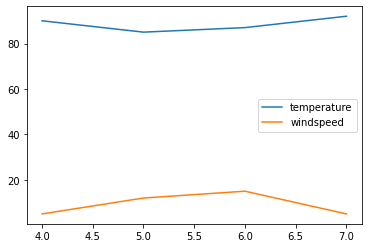

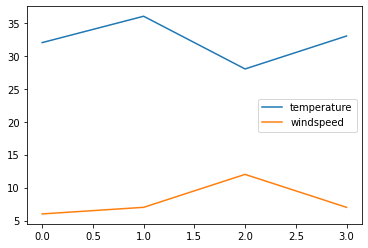

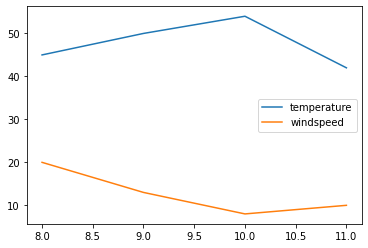

In [123]:
%matplotlib inline
df_gb.plot()

In [124]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [127]:
new_df = df.groupby(lambda x: grouper(df, x, 'temperature'))
for key, d in new_df:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


### 8 - Concatenate 

- Basic Concatenation / Ignore index
- Concatenation And Keys
- Concatenation Using Index
- Concatenate dataframe with series

In [136]:
# Basic Concatenation / Ignore index
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})

df = pd.concat([india_weather, us_weather], ignore_index=True)
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [137]:
#Concatenation And Keys
df = pd.concat([india_weather, us_weather], ignore_index=False, keys=["india", "us"])
df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [153]:
# Concatenation Using Index
temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])

df = pd.concat([temperature_df,windspeed_df],axis=1)
for temp, data in df.groupby("temperature"):
    print(temp)
    print(data)
df

30
       city  temperature city  windspeed
2  banglore           30  NaN        NaN
32
     city  temperature    city  windspeed
0  mumbai           32  mumbai       12.0
45
    city  temperature   city  windspeed
1  delhi           45  delhi        7.0


,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


In [155]:
#Concatenate dataframe with series
s = pd.Series(["Humid","Dry","Rain"], name="event")
df = pd.concat([temperature_df,s],axis=1)
df

,city,temperature,event
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


### 9 - Merge

- Basic Merge Using a Dataframe Column
- Type Of DataBase Joins
- Indicator flag
- Suffixes
- Join

In [169]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})

df3 = pd.merge(df1, df2, on="city")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [158]:
#Type Of DataBase Joins
#["inner", 'outer', 'left', 'right']

df3=pd.merge(df1,df2,on="city",how="inner")
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [157]:
#indicator flag
df3=pd.merge(df1,df2,on="city",how="inner", indicator = True)
df3

,city,temperature,humidity,_merge
0,new york,21,68,both
1,chicago,14,65,both
2,orlando,35,75,both


In [160]:
# suffixes
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})

df3= pd.merge(df1,df2,on="city",how="outer", suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [ ]:
# join
df1.join(df2,lsuffix='_l', rsuffix='_r')

### 10 - Pivot basics

- Pivot 
- Margins
- Grouper

In [164]:
# Pivot
df = pd.read_csv("weather.csv")
df.pivot(index='city',columns='date', values = 'humidity')

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [165]:
# Margins
df.pivot_table(index="city",columns="date", margins=True, aggfunc=np.sum)

humidity                        temperature                       
date     5/1/2017 5/2/2017 5/3/2017  All    5/1/2017 5/2/2017 5/3/2017  All
city                                                                       
beijing        26       30       35   91          80       77       79  236
mumbai         80       83       85  248          75       78       82  235
new york       56       58       60  174          65       66       68  199
All           162      171      180  513         220      221      229  670

In [168]:
# Grouper
df['date'] = pd.to_datetime(df['date'])
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')

humidity                     temperature                      
city          beijing     mumbai new york     beijing     mumbai   new york
date                                                                       
2017-05-31  30.333333  82.666667     58.0   78.666667  78.333333  66.333333

### 11 - Melt 

In [181]:
df = pd.read_csv("weather copy.csv")
melted = pd.melt(df, id_vars=["day"], var_name='city', value_name='temperature')
melted_gb = melted.groupby("city")

for temperature, data in melted_gb:
    print(temperature)
    print(data)

berlin
          day    city  temperature
14     Monday  berlin           41
15    Tuesday  berlin           43
16  Wednesday  berlin           45
17   Thursday  berlin           38
18     Friday  berlin           30
19   Saturday  berlin           45
20     Sunday  berlin           47
chennai
          day     city  temperature
7      Monday  chennai           75
8     Tuesday  chennai           77
9   Wednesday  chennai           75
10   Thursday  chennai           82
11     Friday  chennai           83
12   Saturday  chennai           81
13     Sunday  chennai           77
chicago
         day     city  temperature
0     Monday  chicago           32
1    Tuesday  chicago           30
2  Wednesday  chicago           28
3   Thursday  chicago           22
4     Friday  chicago           30
5   Saturday  chicago           20
6     Sunday  chicago           25


## 12 - Stack / Unstack

In [198]:
df = pd.read_excel("stocks.xlsx",header=[0,1])
df

Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00

In [199]:
df_stacked = df.stack(level=0)
#df_stacked.unstack()
df_stacked

Company  Facebook  Google  Microsoft
0 Price                                NaT    155.00   955.0      66.00
  Price to earnings ratio (P/E)        NaT     37.10    32.0      30.31
  Unnamed: 0_level_0            2017-06-05       NaN     NaN        NaN
1 Price                                NaT    150.00   987.0      69.00
  Price to earnings ratio (P/E)        NaT     36.98    31.3      30.56
  Unnamed: 0_level_0            2017-06-06       NaN     NaN        NaN
2 Price                                NaT    153.00   963.0      62.00
  Price to earnings ratio (P/E)        NaT     36.78    31.7      30.46
  Unnamed: 0_level_0            2017-06-07       NaN     NaN        NaN
3 Price                                NaT    155.00  1000.0      61.00
  Price to earnings ratio (P/E)        NaT     36.11    31.2      30.11
  Unnamed: 0_level_0            2017-06-08       NaN     NaN        NaN
4 Price                                NaT    156.00  1012.0      66.00
  Price to earnings ratio (P/E)        NaT     37.07    30.0      31.00
  Unnamed: 0_level_0            2017-06-09       NaN     NaN        NaN

### 13 - Crosstab

- Margins
- Multi Index Column and Rows
- Normalize
- Aggfunc and Values

In [200]:
df = pd.read_excel("survey.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [202]:
pd.crosstab(df.Handedness, df.Nationality)

Nationality,Bangadesh,China,India,USA
Handedness,,,,
Left,2,2,2,1
Right,0,1,1,3


In [205]:
# Margins
pd.crosstab(df.Handedness, df.Nationality, margins=True)

Nationality,Bangadesh,China,India,USA,All
Handedness,,,,,
Left,2,2,2,1,7
Right,0,1,1,3,5
All,2,3,3,4,12


In [208]:
# Multi Index Column and Rows
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     0   2   5
Male                1     1     2   1     0     1   1   7
All                 2     2     2   1     1     1   3  12

In [209]:
# Normalize
pd.crosstab(df.Sex, df.Handedness, normalize='index')

Handedness,Left,Right
Sex,,
Female,0.400000,0.600000
Male,0.714286,0.285714


In [210]:
# Aggfunc and Values
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness,Left,Right
Sex,,
Female,44.5,31.0
Male,31.2,28.0


### 14 - DateTimeIndex

https://github.com/SimonDequidt/ML_Trading/blob/main/Partie%20A%20-%20Model_2%20-%20LSTM.ipynb

### 15 - Date range

- Finding missing dates from datetimeindex
- Generating DatetimeIndex with periods argument

In [229]:
df = pd.read_csv("aapl_no_dates.csv")
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B')
df.set_index(rng, inplace=True)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


In [223]:
#finding missing dates from datetimeindex
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index.difference(df.index)

DatetimeIndex(['2016-06-04', '2016-06-05', '2016-06-11', '2016-06-12',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-06-26'],
              dtype='datetime64[ns]', freq=None)

In [226]:
df.asfreq('H',method='pad')
# df.asfreq('D',method='pad')
#df.asfreq('B',method='pad')
#df.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330
2016-06-13,147.16,147.45,145.15,146.59,34165445
2016-06-14,147.50,147.50,143.84,145.16,31531232


In [230]:
#generating DatetimeIndex with periods argument
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='H')
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ts.head(20)

2016-06-01 00:00:00    0
2016-06-01 01:00:00    5
2016-06-01 02:00:00    6
2016-06-01 03:00:00    0
2016-06-01 04:00:00    9
2016-06-01 05:00:00    4
2016-06-01 06:00:00    3
2016-06-01 07:00:00    5
2016-06-01 08:00:00    2
2016-06-01 09:00:00    0
2016-06-01 10:00:00    5
2016-06-01 11:00:00    3
2016-06-01 12:00:00    5
2016-06-01 13:00:00    8
2016-06-01 14:00:00    4
2016-06-01 15:00:00    1
2016-06-01 16:00:00    3
2016-06-01 17:00:00    8
2016-06-01 18:00:00    2
2016-06-01 19:00:00    6
Freq: H, dtype: int64

### 16 - Handling Holidays

Using 'B' frequency is not going to help because 4th July was holiday and 'B' is not taking that into account. It only accounts for weekends

- Using CustomBusinessDay to generate US holidays calendar frequency
- AbstractHolidayCalendar
- CustomBusinessDay

In [245]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [243]:
df = pd.read_csv("aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [248]:
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())
rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal)
rng
#df.set_index(rng,inplace=True)

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

In [246]:
# CustomBusinessDay
egypt_weekdays = "Sun Mon Tue Wed Thu"
b = CustomBusinessDay(weekmask=egypt_weekdays)
pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27'],
              dtype='datetime64[ns]', freq='C')

### 17 - Datetime

- Custom
- Invalid dates

In [250]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [251]:
# Custom
pd.to_datetime('2017#01#05', format='%Y#%m#%d')

Timestamp('2017-01-05 00:00:00')

In [252]:
# Handling invalid dates
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-06', 'NaT'], dtype='datetime64[ns]', freq=None)

### 18 - Handling Time Zones

- Two types of datetimes in python:
    - Naive (no timezone awareness)
    - Timezone aware datetime - Convert naive DatetimeIndex to timezone (tz_localize)
   
- Using timezones in date_range

In [260]:
df = pd.read_csv("msft.csv", header=1,index_col='Date Time', parse_dates=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [264]:
from pytz import all_timezones

In [270]:
#df.tz_localize(tz='US/Eastern')
#df = df.tz_convert('Europe/Berlin')
df.tz_localize(tz='Europe/Berlin')
#df.index = df.index.tz_convert('Asia/Calcutta') # tz database doesn't have any Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that

df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [272]:
# Using timezones in date_range

#(1) timezone using pytz
london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')
london

#(2) timezone using dateutil
td = pd.date_range('3/6/2012 00:00', periods=10, freq='H',tz='dateutil/Europe/London')
td

DatetimeIndex(['2012-03-06 00:00:00+00:00', '2012-03-06 01:00:00+00:00',
               '2012-03-06 02:00:00+00:00', '2012-03-06 03:00:00+00:00',
               '2012-03-06 04:00:00+00:00', '2012-03-06 05:00:00+00:00',
               '2012-03-06 06:00:00+00:00', '2012-03-06 07:00:00+00:00',
               '2012-03-06 08:00:00+00:00', '2012-03-06 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('/usr/share/zoneinfo/Europe/London')]', freq='H')

### 21 - mysql database

See HFT project soon